# Geometric Primitives

Covering basics of 2D and 3D primitves, namely points, lines and planes and the transformations between them which form the building blocks used to describe 3D scenes and objects.

Covered in section 2.1 of Chapter 2 in CVAA.

## 1 Projective Geometry in 2D

When dealing with multiple view geometry in computer vision the concept of projective geometry and homogeneous co-ordinates is important.

### 1.1 Points

**Euclidean Vector Representation** : 

In Euclidean space, a point in 2D is represented by a vector with two coordinates:

$$\mathbf{x} = \begin{bmatrix} x \\ y \end{bmatrix} \in \mathbb{R}^2$$

**Homogeneous Coordinates** : 

In projective geometry, a point in 2D is represented by a vector with three coordinates and scaling factor:

$$\mathbf{x} = \begin{bmatrix} x \\ y \\ 1 \end{bmatrix} \in \mathbb{P}^2$$

where $\tilde{w}$ is the scaling factor. $\tilde{w}$ is a non-zero scalar.

### 1.2 Lines

**Euclidean Vector Representation** : 

In Euclidean space, given 2 different points on the line represented as vectors $\mathbf{x}_1$ and $\mathbf{x}_2$, we can parameterize any other point $\mathbf{x}$ on the line as follows:

$$\mathbf{x} = \mathbf{x}_1 + t(\mathbf{x}_2 - \mathbf{x}_1)$$
$$
\mathbf{x} = \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} x_1 \\ y_1 \end{bmatrix} + t\begin{bmatrix} x_2 - x_1 \\ y_2 - y_1 \end{bmatrix}
$$

where $t$ is a scalar parameter.

**Scalar Representation** :

The simplest way to represent a line in 2D is to use the scalar representation:

$$y = mx + c$$

where $$m = \frac{y_2 - y_1}{x_2 - x_1}$$ and $$c = y_1 - mx_1 = \frac{x_1y_2 - x_2y_1}{x_2 - x_1}$$

A more general form of the line equation is:

$$ax + by + c = 0$$

**Homogeneous Representation**:

In homogeneous coordinates, a line in 2D space is represented by a vector with three coordinates:

$$\mathbf{l} = \begin{bmatrix} a \\ b \\ c \end{bmatrix} = \tilde{w}\begin{bmatrix} m \\ -1 \\ c \end{bmatrix} \in \mathbb{P}^2$$


### 1.3 Properties of Homogeneous Coordinates

Now we know how to represent point and lines in 2D space using homogeneous coordinates. But we can simply represent them using 2 dimensional vectors so why do we need the 3rd dimension? It'll become clear in this section where we discuss and try to visualize the properties of homogeneous coordinates and we'll see how simple equations arise when we use homogeneous coordinates.

I'll not give the algebraic proof for the properties of homogeneous coordinates but I'll try to give the geometric intuition behind them by visualizing them in 2D space.

#### 1.3.1 Checking if a point lies on a line

A point $\mathbf{x}$ lies on a line $\mathbf{l}$ if and only if their dot product is zero:

$$\mathbf{x} \cdot \mathbf{l} = 0$$

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

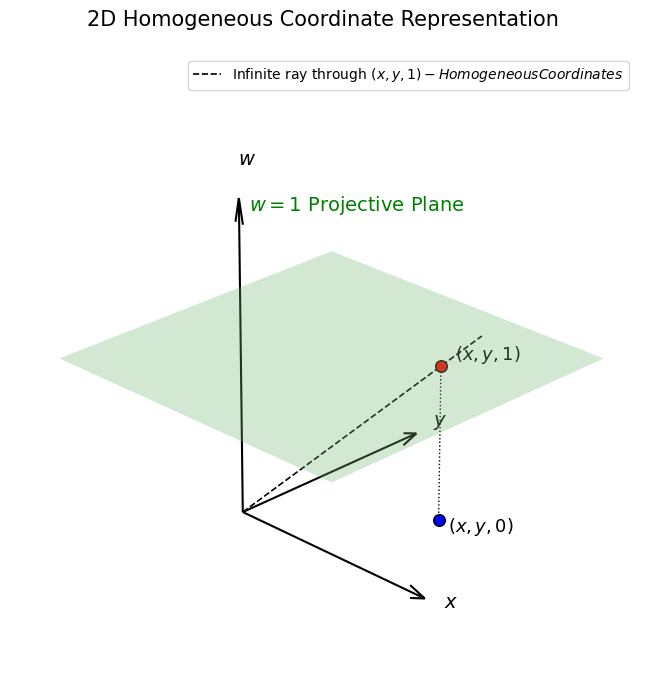

In [15]:
# Set up the figure and 3D axis
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection='3d')

# Draw the w=1 plane
xx, yy = np.meshgrid(np.linspace(-1, 2, 10), np.linspace(-1, 2, 10))
zz = np.ones_like(xx)
ax.plot_surface(xx, yy, zz, alpha=0.3, color='lightgreen', edgecolor='none')
ax.text(-2, 2, 1.05, r'$w=1$ Projective Plane', fontsize=14, color='green')

# Draw axes
ax.quiver(0, 0, 0, 2, 0, 0, arrow_length_ratio=0.08, color='black')
ax.quiver(0, 0, 0, 0, 2, 0, arrow_length_ratio=0.08, color='black')
ax.quiver(0, 0, 0, 0, 0, 2, arrow_length_ratio=0.08, color='black')

# Dashed line from origin through (x, y, 1)
x, y = 1.2, 1.0
t = np.linspace(0, 1.2, 100)
x_line = x * t
y_line = y * t
w_line = t
ax.plot(x_line, y_line, w_line, 'k--', linewidth=1.2, label='Infinite ray through $(x, y, 1) - Homogeneous Coordinates$')

# Mark the point (x, y, 1)
ax.scatter([x], [y], [1], color='red', s=70, edgecolor='black', zorder=10)
ax.text(x + 0.1, y + 0.05, 1.05, r'$(x, y, 1)$', fontsize=13)

# Mark the projection on the w=0 plane
ax.scatter([x], [y], [0], color='blue', edgecolor='black', s=70, zorder=10)
ax.plot([x, x], [y, y], [0, 1], 'k:', linewidth=1)
ax.text(x + 0.1, y, -0.05, r'$(x, y, 0)$', fontsize=13)

# Annotate axes
ax.text(2.2, 0, 0, r'$x$', fontsize=14)
ax.text(0, 2.2, 0, r'$y$', fontsize=14)
ax.text(0, 0, 2.2, r'$w$', fontsize=14)

# Set plot limits and view angle
ax.set_xlim(-1, 2)
ax.set_ylim(-1, 2)
ax.set_zlim(0, 2)
ax.view_init(elev=25, azim=-45)
ax.set_box_aspect([1, 1, 0.9])
ax.axis('off')

# Add a title
plt.title('2D Homogeneous Coordinate Representation', fontsize=15, pad=20)
plt.legend()

plt.tight_layout()
plt.show()